# Image segmentation using Expectation-Maximization

## Prerequisites

- NumPy
- Matplotlib
- SciPy

In [8]:
import numpy as np
from matplotlib.image import imread
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from EM import EM


## Read Image

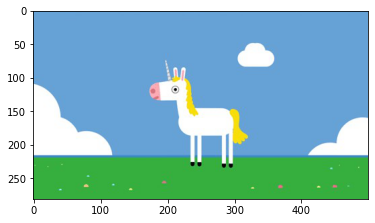

In [9]:
file = 'images/unicorn.jpg'
img = imread(file)
plt.imshow(img)

## Smoothing Image

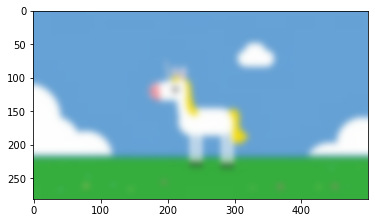

In [10]:
sigma = 5
img = gaussian_filter(img, sigma=(sigma, sigma, 0))
plt.imshow(img)

## Extract Features

In [11]:
# Wenjuan's Part: find the optimal value of weight
weight = [1, 1]

x = img.shape[0]
y = img.shape[1]
feature = np.ndarray(shape=(x * y, 5), dtype=float)

count = 0
for i in range(x):
    for j in range(y):
        color = img[i][j] / 255
        position = np.array([i / x, j / y])
        a = np.concatenate((color * weight[0], position * weight[1]))
        feature[count] = a
        count += 1

feature = feature - np.mean(feature, axis=0)

## Expectation-Maximization with Gaussian Mixture Model

In [12]:
k = 4
em = EM()
res = em.fit(k, feature)

C:\Users\huang\OneDrive\Modern Signal Processing\Project\EM-image-seg\EM.py:8: RuntimeWarning: overflow encountered in double_scalars
  product = product * likelihood[i][likelihood_index[i]]
C:\Users\huang\OneDrive\Modern Signal Processing\Project\EM-image-seg\EM.py:82: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs((new_log_likelihood - old_log_likelihood) / old_log_likelihood) < 0.2:


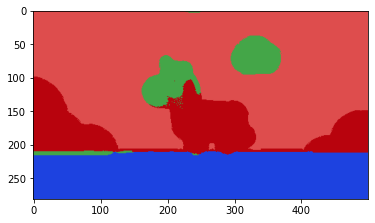

In [13]:
random_color = np.ndarray(shape=(k, 3))
for i in range(random_color.shape[0]):
    random_color[i] = np.array([np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256)])

clustered_img = np.ndarray(shape=(x, y, 3), dtype=int)

for i in range(len(res)):
    cluster = res[i]
    for j in range(len(cluster)):
        y_index = int(cluster[j] % y)
        x_index = int((cluster[j] - y_index) / y)
        clustered_img[x_index][y_index] = random_color[i]

plt.imshow(clustered_img)